In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [2]:
# create column labels
columns = ['duration',
            'protocol_type',
            'service',
            'flag',
            'src_bytes',
            'dst_bytes',
            'land',
            'wrong_fragment',
            'urgent',
            'hot',
            'num_failed_logins',
            'logged_in',
            'num_compromised',
            'root_shell',
            'su_attempted',
            'num_root',
            'num_file_creations',
            'num_shells',
            'num_access_files',
            'num_outbound_cmds',
            'is_host_login',
            'is_guest_login',
            'count',
            'srv_count',
            'serror_rate',
            'srv_serror_rate',
            'rerror_rate',
            'srv_rerror_rate',
            'same_srv_rate',
            'diff_srv_rate',
            'srv_diff_host_rate',
            'dst_host_count',
            'dst_host_srv_count',
            'dst_host_same_srv_rate',
            'dst_host_diff_srv_rate',
            'dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate',
            'dst_host_serror_rate',
            'dst_host_srv_serror_rate',
            'dst_host_rerror_rate',
            'dst_host_srv_rerror_rate',
            'attack',
            'level']

In [3]:
# create dataframe from datasets with labels
# train_20_df = pd.read_csv('KDDTrain+_20Percent.txt', names=columns)
train_df = pd.read_csv('KDDTrain+.txt', names=columns)
test_df = pd.read_csv('KDDTest+.txt', names=columns)

In [4]:
# create target variable, if 'attack' != normal, then an attack occured
# train_20_df['anomaly'] = np.where(train_20_df['attack']=='normal', 0, 1)
train_df['anomaly'] = np.where(train_df['attack']=='normal', 0, 1)
test_df['anomaly'] = np.where(test_df['attack']=='normal', 0, 1)

# drop "attack" column
# train_20_df.drop(['attack'], axis=1, inplace=True)
# train_df.drop(['attack'], axis=1, inplace=True)
# test_df.drop(['attack'], axis=1, inplace=True)

# train_20_df.head()

In [5]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,anomaly
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,0
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,0
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1


In [6]:
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,anomaly
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,0
22540,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,0
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15,1
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21,0


In [7]:
# # classify the types of attacks into different lists
# dos_attacks = ['apache2',
#                'back',
#                'land',
#                'neptune',
#                'mailbomb',
#                'pod',
#                'processtable',
#                'smurf',
#                'teardrop',
#                'udpstorm',
#                'worm']
# probe_attacks = ['ipsweep',
#                  'mscan',
#                  'nmap',
#                  'portsweep',
#                  'saint',
#                  'satan']
# privilege_attacks = ['buffer_overflow',
#                      'loadmdoule',
#                      'perl',
#                      'ps',
#                      'rootkit',
#                      'sqlattack',
#                      'xterm']
# access_attacks = ['ftp_write',
#                   'guess_passwd',
#                   'http_tunnel',
#                   'imap',
#                   'multihop',
#                   'named',
#                   'phf',
#                   'sendmail',
#                   'snmpgetattack',
#                   'snmpguess',
#                   'spy',
#                   'warezclient',
#                   'warezmaster',
#                   'xclock',
#                   'xsnoop']

# # labels of attack classification
# attack_labels = ['Normal',
#                  'DoS',
#                  'Probe',
#                  'Privilege',
#                  'Access']

# # function to classify each attack label into a category
# def classify_attack(attack):
#     if attack in dos_attacks:
#         attack_type = 1
#     elif attack in probe_attacks:
#         attack_type = 2
#     elif attack in privilege_attacks:
#         attack_type = 3
#     elif attack in access_attacks:
#         attack_type = 4
#     else: # not an attack
#         attack_type = 0
#     return attack_type

# # map the data and join to the data set
# train_attack_type = train_df.attack.apply(classify_attack)
# train_df['attack_type'] = train_attack_type

# test_attack_type = test_df.attack.apply(classify_attack)
# test_df['attack_type'] = test_attack_type

# # view the result
# # print(train_20_df.head())
# train_df.head()
# # test_df.head()

In [10]:
# encode categorical nominal features
nominal_features = ['protocol_type',
                   'service',
                   'flag']
# train_20_encoded = pd.get_dummies(train_20_df[nominal_features])
train_encoded = pd.get_dummies(train_df[nominal_features])
test_encoded_base = pd.get_dummies(test_df[nominal_features])

# make up the difference of features that aren't in the test set and reorder them
test_index = np.arange(len(test_df.index))
# train_20_column_differences = list(set(train_20_encoded.columns.values)-set(test_encoded_base.columns.values))
# train_20_difference_df = pd.DataFrame(0, index=test_index, columns=train_20_column_differences)
# train_20_column_order = train_20_encoded.columns.to_list()

train_column_differences = list(set(train_encoded.columns.values)-set(test_encoded_base.columns.values))
train_difference_df = pd.DataFrame(0, index=test_index, columns=train_column_differences)
train_column_order = train_encoded.columns.to_list()

# append and reorder columns
test_encoded_temp = test_encoded_base.join(train_difference_df)
test_final = test_encoded_temp[train_column_order].fillna(0)

numeric_features = ['land',
                   'logged_in',
                   'is_host_login',
                   'is_guest_login',
                   'duration',
                   'src_bytes',
                   'dst_bytes',
                   'wrong_fragment',
                   'urgent',
                   'hot',
                   'num_failed_logins',
                   'num_compromised',
                   'root_shell',
                   'su_attempted',
                   'num_root',
                   'num_file_creations',
                   'num_shells',
                   'num_access_files',
                   'num_outbound_cmds',
                   'count',
                   'srv_count',
                   'serror_rate',
                   'srv_serror_rate',
                   'rerror_rate',
                   'srv_rerror_rate',
                   'same_srv_rate',
                   'diff_srv_rate',
                   'srv_diff_host_rate',
                   'dst_host_count',
                   'dst_host_srv_count',
                   'dst_host_same_srv_rate',
                   'dst_host_diff_srv_rate',
                   'dst_host_same_src_port_rate',
                   'dst_host_srv_diff_host_rate',
                   'dst_host_serror_rate',
                   'dst_host_srv_serror_rate',
                   'dst_host_rerror_rate',
                   'dst_host_srv_rerror_rate'
                   ]

# models to be fitted and tested
to_fit = train_encoded.join(train_df[numeric_features])
test_set = test_final.join(test_df[numeric_features])

In [11]:
# assign feature matrix X and target vector y, skipping 'attack' and 'level'
# creating 2 target vectors, 1 for whether an attack is present, the other for type of attack
anomaly_y = train_df['anomaly']
# type_y = train_df['attack_type']
# X = train_20_df.iloc[:,:41]

test_anom_y = test_df['anomaly']
# test_type_y = test_df['attack_type']

# create the training sets
X_train, X_test, y_train, y_test = train_test_split(to_fit, anomaly_y, test_size=0.6)
# train_type_X, val_type_X, train_type_y, val_type_y = train_test_split(to_fit, type_y, test_size=0.6)

In [12]:
X_test

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
13103,0,1,0,0,0,0,0,0,0,0,...,255,28,0.11,0.06,0.00,0.00,0.73,0.0,0.01,0.0
48487,0,1,0,0,0,0,0,0,0,0,...,255,1,0.00,0.07,0.00,0.00,1.00,1.0,0.00,0.0
87773,0,1,0,0,0,0,0,0,0,0,...,255,7,0.03,0.07,0.00,0.00,1.00,1.0,0.00,0.0
13726,0,1,0,0,0,0,0,0,0,0,...,35,255,1.00,0.00,0.03,0.03,0.00,0.0,0.00,0.0
35318,0,1,0,0,0,0,0,0,0,0,...,147,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59724,0,1,0,0,0,0,0,0,0,0,...,255,100,0.39,0.02,0.39,0.00,0.00,0.0,0.00,0.0
79676,0,1,0,0,0,0,0,0,0,0,...,224,5,0.02,0.08,0.00,0.00,0.94,1.0,0.00,0.0
48633,0,1,0,0,0,0,0,0,0,0,...,36,255,1.00,0.00,0.03,0.03,0.00,0.0,0.00,0.0
30883,0,1,0,0,0,0,0,0,0,0,...,255,14,0.05,0.01,0.05,0.00,0.00,0.0,0.00,0.0


In [13]:
# model for our anomaly classification and predictions
# due to the nature of the data, Random Forest will be the main model
# that we will use for classification
anomaly_RFC = RandomForestClassifier()
anomaly_RFC.fit(X_train, y_train)
anomaly_pred_RFC = anomaly_RFC.predict(X_test)

# with scaling- not needed for RFC
# anomaly_RFC.fit(X_train_std, y_train) 
# anomaly_pred_RFC = anomaly_RFC.predict(X_test_std)

# make predictions for other model types
# anomaly_MLP = MLPClassifier()
# anomaly_MLP.fit(X_train_std, y_train)
# anomaly_pred_MLP = anomaly_MLP.predict(X_test_std)

# anomaly_SVC = LinearSVC(max_iter=5000)
# anomaly_SVC.fit(X_train_std, y_train)
# anomaly_pred_SVC = anomaly_SVC.predict(X_test_std)

# anomaly_KNN = KNeighborsClassifier()
# anomaly_KNN.fit(X_train_std, y_train)
# anomaly_pred_KNN = anomaly_KNN.predict(X_test_std)

# anomaly_LR = LogisticRegression(max_iter=5000)
# anomaly_LR.fit(X_train_std, y_train)
# anomaly_pred_LR = anomaly_LR.predict(X_test_std)

# calculate and display base accuracy
base_RFC_score = accuracy_score(anomaly_pred_RFC, y_test)
print("Base RFC Score:" + str(base_RFC_score))

# # base_MLP_score = accuracy_score(anomaly_pred_MLP, y_test)
# # print("Base MLP Score:" + str(base_MLP_score))

# base_SVC_score = accuracy_score(anomaly_pred_SVC, y_test)
# print("Base SVC Score:" + str(base_SVC_score))

# base_KNN_score = accuracy_score(anomaly_pred_KNN, y_test)
# print("Base KNN Score:" + str(base_KNN_score))

# base_LR_score = accuracy_score(anomaly_pred_LR, y_test)
# print("Base LR Score:" + str(base_LR_score))

Base RFC Score:0.9984785139712108


In [14]:
# define models to be tested
models = [RandomForestClassifier()
         ]

# hold the performance of the models
model_perf = []

# loop through models to load their performances
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, 
                                 X_train,
                                 y_train,
                                 scoring='accuracy')
    for count, accuracy in enumerate(accuracies):
        model_perf.append((model_name, count, accuracy))
        print(model_name + ':' + str(accuracy))

RandomForestClassifier:0.9984123834094066
RandomForestClassifier:0.9984123834094066
RandomForestClassifier:0.9985116094463187
RandomForestClassifier:0.9986108354832308
RandomForestClassifier:0.9982137540934802


<AxesSubplot:>

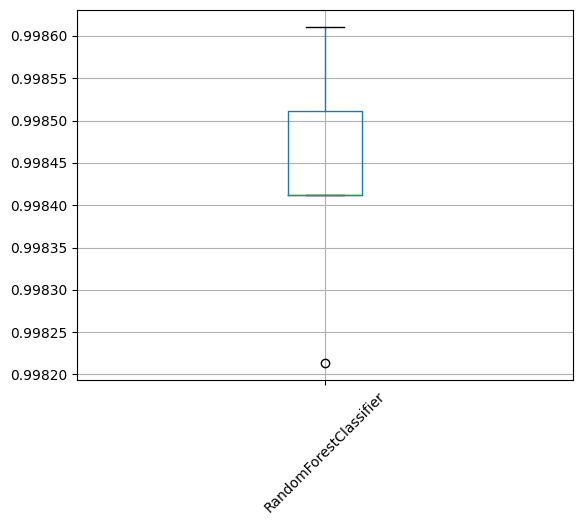

In [15]:
# print a box plot to show the performance of various models
result_df = pd.DataFrame(model_perf, columns=['model_name', 'count', 'accuracy'])
result_df.pivot(index='count', columns='model_name', values='accuracy').boxplot(rot=45)

In [16]:
# create a function to get analytical data from our models
def get_predictions(data, predictions, y):
    prediction_series = pd.Series(predictions, index = y.index)
    
    # predicted and actual outcomes of data
    pred_vs_actual = data.assign(predicted=prediction_series)
    original_data = pred_vs_actual.assign(actual=y).dropna()
    conf_matrix = confusion_matrix(original_data['actual'],
                                       original_data['predicted'])
    # rows with failed predictions
    base_errors = original_data[original_data['actual'] != original_data['predicted']]
    
    # drop irrelevant columns
    non_zeros = base_errors.loc[:,(base_errors != 0).any(axis=0)]
    
    # categorize errors
    false_positives = non_zeros.loc[non_zeros.actual==0]
    false_negatives = non_zeros.loc[non_zeros.actual==1]
    
    # create prediction dictionary
    prediction_dict = {'data': original_data,
                      'confusion_matrix': conf_matrix,
                      'errors': base_errors,
                      'non_zeros': non_zeros,
                      'false_positives': false_positives,
                      'false_negatives': false_negatives}
    return prediction_dict

<AxesSubplot:>

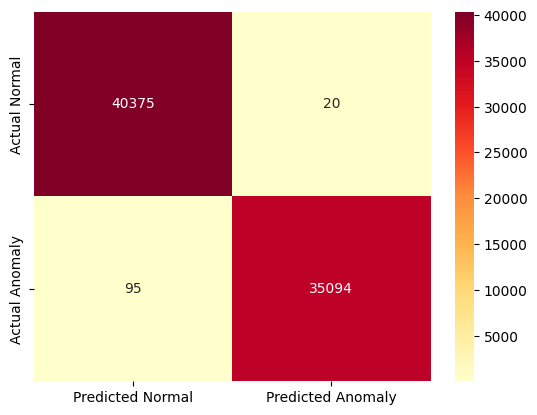

In [17]:
# get the prediction data to compare against our Random Forest model, since it was the most accurate
anomaly_prediction_data = get_predictions(train_df,
                                         anomaly_pred_RFC,
                                         y_test)
# make a heat map of the confusion matrix
sns.heatmap(data=anomaly_prediction_data['confusion_matrix'],
           xticklabels = ['Predicted Normal', 'Predicted Anomaly'],
           yticklabels = ['Actual Normal', 'Actual Anomaly'],
           cmap='YlOrRd',
           fmt='d',
           annot=True)

In [18]:
# take a look at why we had some incorrect classifications in model
anomaly_prediction_data['errors'].describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,anomaly,predicted,actual
count,115.000000,1.150000e+02,115.000000,115.000000,115.0,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,280.382609,4.565835e+04,6923.008696,0.043478,0.0,0.026087,0.243478,0.086957,0.521739,0.113043,...,0.364957,0.058957,0.072696,0.058609,0.060348,0.037826,5.582609,0.826087,0.173913,0.826087
std,1694.879024,4.788389e+05,60618.205350,0.204824,0.0,0.207781,0.874505,0.600661,0.501713,0.659149,...,0.414006,0.183697,0.234331,0.213812,0.217191,0.182299,5.238157,0.380693,0.380693,0.380693
min,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,0.000000,1.230000e+02,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000
75%,4.000000,3.340000e+02,318.500000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.930000,0.005000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,1.000000
max,12546.000000,5.135678e+06,649186.000000,1.000000,0.0,2.000000,6.000000,5.000000,1.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000


In [19]:
# take a closer look at why we had some false positives (inorrectly classified)
anomaly_prediction_data['false_positives'].std()

/tmp/ipykernel_11/942956679.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anomaly_prediction_data['false_positives'].std()


duration                        2763.556413
src_bytes                      12159.612879
dst_bytes                       5585.012976
land                               0.366348
urgent                             0.000000
hot                                0.615587
num_failed_logins                  0.000000
logged_in                          0.510418
num_compromised                    0.489360
root_shell                         0.000000
su_attempted                       0.000000
num_root                           0.923381
num_file_creations                 4.472136
num_shells                         0.000000
num_access_files                   0.000000
is_guest_login                     0.000000
count                              4.206511
srv_count                          0.598243
serror_rate                        0.412789
srv_serror_rate                    0.444262
rerror_rate                        0.307141
srv_rerror_rate                    0.366348
same_srv_rate                   

In [20]:
# take a closer look at why we had some false negatives (undetected anomalies)
anomaly_prediction_data['false_negatives'].std()

/tmp/ipykernel_11/1353973628.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anomaly_prediction_data['false_negatives'].std()


duration                         1382.303160
src_bytes                      526851.371490
dst_bytes                       66665.322268
land                                0.144321
urgent                              0.228437
hot                                 0.922167
num_failed_logins                   0.660008
logged_in                           0.501286
num_compromised                     0.691494
root_shell                          0.102598
su_attempted                        0.102598
num_root                            0.730399
num_file_creations                  0.657117
num_shells                          0.102598
num_access_files                    0.175804
is_guest_login                      0.201895
count                              30.131570
srv_count                           0.720520
serror_rate                         0.223586
srv_serror_rate                     0.175804
rerror_rate                         0.211849
srv_rerror_rate                     0.182685
same_srv_r

<AxesSubplot:>

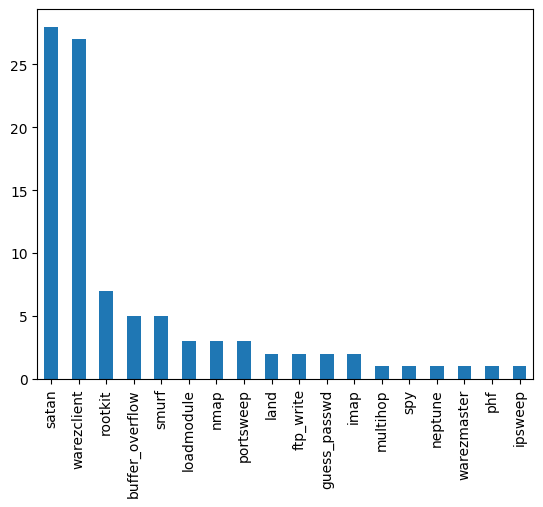

In [21]:
# examine which types of anomalies produced the most errors (went undetected)
anomaly_prediction_data['false_negatives'].attack.value_counts().plot.bar()

In [22]:
# print classification reports for the other various models
report_labels = ['actual', 'predicted']
RFC_report = classification_report(y_test, anomaly_pred_RFC, target_names = report_labels)
# # MLP_report = classification_report(y_test, anomaly_pred_MLP, target_names = report_labels)
# SVC_report = classification_report(y_test, anomaly_pred_SVC, target_names = report_labels)
# KNN_report = classification_report(y_test, anomaly_pred_KNN, target_names = report_labels)
# LR_report = classification_report(y_test, anomaly_pred_LR, target_names = report_labels)

report_list = [RFC_report,
#             # MLP_report, 
#                SVC_report, 
#                KNN_report, 
#                LR_report
              ]
for report in report_list:
    print(':\n', report)
    print('-------------------------------------------------------')

:
               precision    recall  f1-score   support

      actual       1.00      1.00      1.00     40395
   predicted       1.00      1.00      1.00     35189

    accuracy                           1.00     75584
   macro avg       1.00      1.00      1.00     75584
weighted avg       1.00      1.00      1.00     75584

-------------------------------------------------------


In [56]:
# now to test the model against unseen data as it will behave in the real world
full_model = RandomForestClassifier(random_state=1)
full_model.fit(to_fit, anomaly_y)
full_pred = full_model.predict(test_set)

# get the prediction score
full_accuracy = accuracy_score(full_pred, test_anom_y)
full_accuracy

0.7802519517388219

<AxesSubplot:>

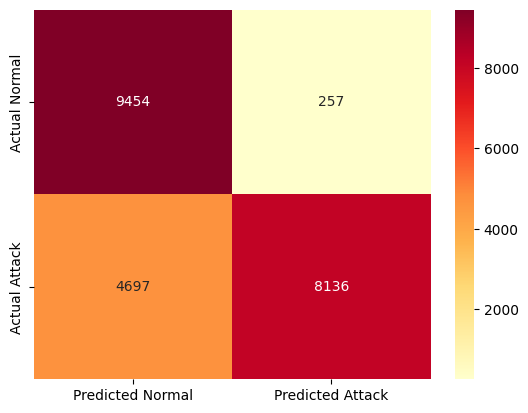

In [58]:
# get the prediction data
full_prediction_data = get_predictions(test_df, full_pred, test_anom_y)

# make a heat map of the confusion matrix
sns.heatmap(data=full_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted Attack'],
            yticklabels = ['Actual Normal','Actual Attack'],
            cmap="YlOrRd",
            fmt='d',
            annot=True)

In [ ]:
# Now we try to tune our Random Forest parameters to find those that produce the best results
# parameters = {"n_estimators": [5, 10, 50, 100, 250],
#              "max_depth": [2, 4, 8, 16, None],
#              "max_features": ["sqrt", "log2", None],
#              }

# cv = GridSearchCV(full_model, parameters, cv=5, verbose=3)
# cv.fit(to_fit, anomaly_y)

In [ ]:
# # function to print our grid search cv results
# def print_cv(results):
#     print(f'Best parameters are: {results.best_params_}\n')
#     mean_score = results.cv_results_['mean_test_score']
#     std_score = results.cv_results_['std_test_score']
#     params = results.cv_results_['params']
#     for mean, std, params in zip(mean_score, std_score, params):
#         print(f'{round(mean,5)} + or -{round(std, 5)} for the {params}')

In [ ]:
# print_cv(cv)

In [53]:
# now use the optimal parameters from the grid search cv
full_model = RandomForestClassifier(max_depth=None, n_estimators=500, random_state=1)
full_model.fit(to_fit, anomaly_y)
full_pred = full_model.predict(test_set)

# get the prediction score
full_accuracy = accuracy_score(full_pred, test_anom_y)
full_accuracy

0.76166607523066

In [43]:
# scale features to standardize data before PCA
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [71]:
# perform principal component analysis to reduce feature dimensionality
pca10 = PCA(n_components = 10)
pca10.fit(X_train_std)
pca10.fit(X_test_std)
X_pca10_train = pca10.transform(X_train_std)
X_pca10_test = pca10.transform(X_test_std)
pca10_RFC = RandomForestClassifier(max_depth=None, n_estimators=1000, random_state=1)
pca10_RFC.fit(X_pca10_train, y_train)
pca10_RFC_y_pred = pca10_RFC.predict(X_pca10_test)
pca10_RFC_accuracy = accuracy_score(y_test, pca10_RFC_y_pred)
pca10_RFC_accuracy

0.9964675063505504

<AxesSubplot:>

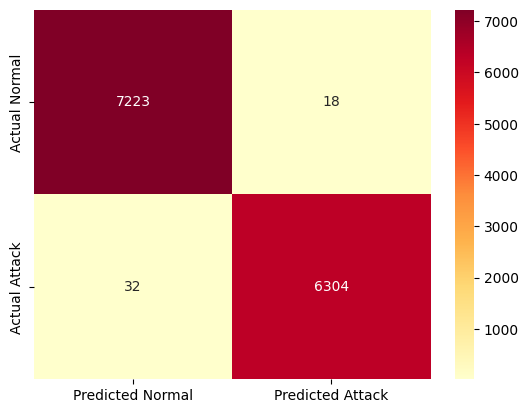

In [72]:
# get the prediction data
pca10_prediction_data = get_predictions(test_df, pca10_RFC_y_pred, y_test)

# make a heat map of the confusion matrix
sns.heatmap(data=pca10_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted Attack'],
            yticklabels = ['Actual Normal','Actual Attack'],
            cmap="YlOrRd",
            fmt='d',
            annot=True)